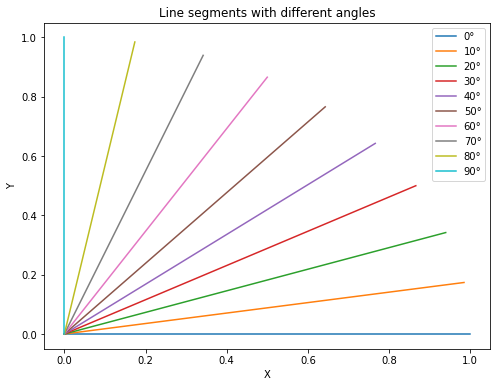

In [ ]:
#Problem 2(a)

import numpy as np
import matplotlib.pyplot as plt

def generate_line_points(angle_deg, distance, num_points=100):
    # Convert angle from degrees to radians
    angle_rad = np.deg2rad(angle_deg)
    
    # Calculate endpoint coordinates
    end_x = distance * np.cos(angle_rad)
    end_y = distance * np.sin(angle_rad)
    
    # Generate interpolated points
    x = np.linspace(0, end_x, num_points)
    y = np.linspace(0, end_y, num_points)
    
    return x, y

# Test the function with angles between 0 and 90 degrees
fig, ax = plt.subplots(figsize=(8, 6))
for angle_deg in range(0, 91, 10):
    x, y = generate_line_points(angle_deg, 1)
    ax.plot(x, y, label=f"{angle_deg}°")
    
ax.legend()
ax.set_title("Line segments with different angles")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()


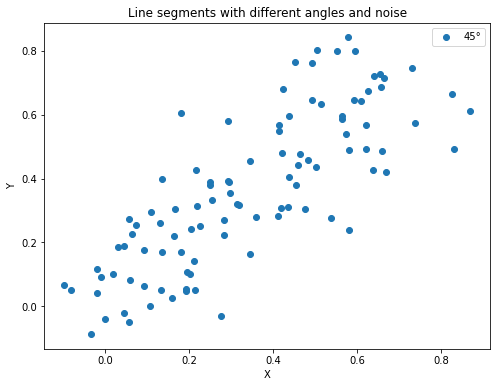

In [ ]:
#Problem 2(b)

import numpy as np
import matplotlib.pyplot as plt

def generate_line_points(angle_deg, distance, num_points=100):
    # Convert angle from degrees to radians
    angle_rad = np.deg2rad(angle_deg)
    
    # Calculate endpoint coordinates
    end_x = distance * np.cos(angle_rad)
    end_y = distance * np.sin(angle_rad)
    
    # Generate interpolated points
    x = np.linspace(0, end_x, num_points)
    y = np.linspace(0, end_y, num_points)
    
    # Add Gaussian noise with specified mean and standard deviation
    noise_mean = 0
    noise_std = 0.1
    x += np.random.normal(noise_mean, noise_std, size=num_points)
    y += np.random.normal(noise_mean, noise_std, size=num_points)
    
    return x, y

# Test the function with angles between 0 and 90 degrees
fig, ax = plt.subplots(figsize=(8, 6))
for angle_deg in range(45, 46, 1):
    x, y = generate_line_points(angle_deg, 1)
    ax.scatter(x, y, label=f"{angle_deg}°")
    
ax.legend()
ax.set_title("Line segments with different angles and noise")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()


In [ ]:
#Problem 2(c)

import numpy as np
import matplotlib.pyplot as plt

def generate_line_points(angle_deg, distance, num_points=100):
    # Convert angle from degrees to radians
    angle_rad = np.deg2rad(angle_deg)
    
    # Calculate endpoint coordinates
    end_x = distance * np.cos(angle_rad)
    end_y = distance * np.sin(angle_rad)
    
    # Generate interpolated points
    x = np.linspace(0, end_x, num_points)
    y = np.linspace(0, end_y, num_points)
    
    # Add Gaussian noise with specified mean and standard deviation
    noise_mean = 0
    noise_std = 0.1
    x += np.random.normal(noise_mean, noise_std, size=num_points)
    y += np.random.normal(noise_mean, noise_std, size=num_points)
    
    return x, y

def fit_line(x, y):
    # Fit a line to the points using least squares regression
    A = np.vstack([x, np.ones(len(x))]).T
    m, b = np.linalg.lstsq(A, y, rcond=None)[0]
    
    return m, b

# Test the function with angles between 0 and 90 degrees
true_m, true_b = np.tan(np.deg2rad(45)), 0  # Define the true line parameters
errors = []
for angle_deg in range(45, 46, 1):
    x, y = generate_line_points(angle_deg, 1)
    m, b = fit_line(x, y)
    errors.append((m-true_m, b-true_b))
    
# Print the errors for each angle
for i, angle_deg in enumerate(range(45, 46, 1)):
    print(f"Angle: {angle_deg}°, Error: {errors[i]}")


Angle: 45°, Error: (-0.14213288246339628, 0.04754426247719786)


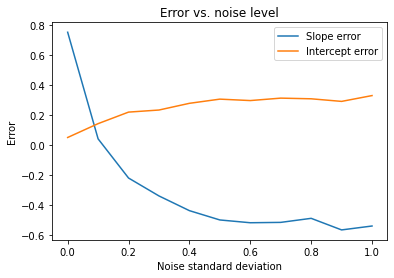

In [ ]:
#Problem 2(d)

import numpy as np
import matplotlib.pyplot as plt

def generate_line_points(angle_deg, distance, num_points=100, noise_std=0):
    # Convert angle from degrees to radians
    angle_rad = np.deg2rad(angle_deg)
    
    # Calculate endpoint coordinates
    end_x = distance * np.cos(angle_rad)
    end_y = distance * np.sin(angle_rad)
    
    # Generate interpolated points
    x = np.linspace(0, end_x, num_points)
    y = np.linspace(0, end_y, num_points)
    
    # Add Gaussian noise with specified mean and standard deviation
    noise_mean = 0
    x += np.random.normal(noise_mean, noise_std, size=num_points)
    y += np.random.normal(noise_mean, noise_std, size=num_points)
    
    return x, y

def fit_line(x, y):
    # Fit a line to the points using least squares regression
    A = np.vstack([x, np.ones(len(x))]).T
    m, b = np.linalg.lstsq(A, y, rcond=None)[0]
    
    return m, b

true_m, true_b = np.tan(np.deg2rad(30)), 0  # Define the true line parameters
noise_stds = np.linspace(0, 1, num=11)  # Define the range of noise standard deviation values
errors = []
for noise_std in noise_stds:
    avg_error = [0, 0]
    for angle_deg in range(0, 91, 10):
        x, y = generate_line_points(angle_deg, 1, noise_std=noise_std)
        m, b = fit_line(x, y)
        error = (m-true_m, b-true_b)
        avg_error[0] += error[0]
        avg_error[1] += error[1]
    avg_error[0] /= len(range(0, 91, 10))
    avg_error[1] /= len(range(0, 91, 10))
    errors.append(avg_error)

# Plot the error as a function of noise level
plt.plot(noise_stds, np.array(errors)[:, 0], label="Slope error")
plt.plot(noise_stds, np.array(errors)[:, 1], label="Intercept error")
plt.xlabel("Noise standard deviation")
plt.ylabel("Error")
plt.title("Error vs. noise level")
plt.legend()
plt.show()


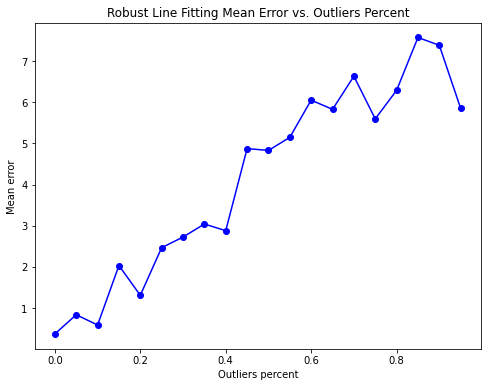

In [ ]:
#Problem 2(e)

import numpy as np
import cv2
import matplotlib.pyplot as plt

def robust_fitline_ks(pointsX, pointsY):
    # Compute the mean of the x and y coordinates
    mean_x = np.mean(pointsX)
    mean_y = np.mean(pointsY)
    
    #Covariance matrix
    points = [pointsX, pointsY]
    # print(np.shape(points))
    cov_matrix = np.cov(points)
    
    #Eigenvectors and eigenvalues of the covariance matrix
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    
    #Eigenvector with the smallest eigenvalue (i.e. the direction of least variance)
    smallest_eig_idx = np.argmin(eigen_values)
    line_direction = eigen_vectors[:, smallest_eig_idx]
    
    #Slope and intercept of the best-fit line
    slope = line_direction[1] / line_direction[0]
    intercept = mean_y - slope * mean_x
    
    return slope, intercept





def generate_line_points_and_noise_and_outliers(angle_deg, distance, p=0.1, num_points=100):
    angle_rad = np.deg2rad(angle_deg)
    
    end_x = distance * np.cos(angle_rad)
    end_y = distance * np.sin(angle_rad)
    
    x = np.linspace(0, end_x, num_points)
    y = np.linspace(0, end_y, num_points)
    
    # Add Gaussian noise with specified mean and standard deviation
    noise_mean = 0
    noise_std = 0.1
    x += np.random.normal(noise_mean, noise_std, size=num_points)
    y += np.random.normal(noise_mean, noise_std, size=num_points)
    
    idx = np.random.rand(num_points)
    mask =  idx < p # p (in decimal) of outliers
    y[mask] += np.random.normal(0.1, 2, round(np.sum(mask)) )
    return x, y, mask

# Test the function with angles between 0 and 90 degrees
x, y, mask = generate_line_points_and_noise_and_outliers(45, 1) #45 degree angle set
m, b = robust_fitline_ks(x, y)



outliers_percnt = np.arange(0, 1, 0.05) #Upto 1% outlier percent
errors = []
for p in outliers_percnt:
    mask = np.random.rand(100) < p
    x, y, mask = generate_line_points_and_noise_and_outliers(45, 1, p, 100)
    y[mask] += np.random.normal(0, 10, np.sum(mask))
    line = robust_fitline_ks(x, y)
    residuals = np.abs((line[0] * x + line[1]) - y)
    errors.append(np.mean(residuals))
plt.figure(figsize=(8, 6))
plt.plot(outliers_percnt, errors, 'b-o')
plt.xlabel('Outliers percent')
plt.ylabel('Mean error')
plt.title('Robust Line Fitting Mean Error vs. Outliers Percent')
plt.show()

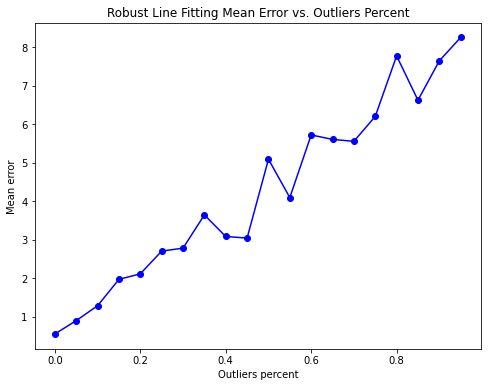

In [ ]:
#Problem 2(f)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Test the function with angles between 0 and 90 degrees
x, y, mask = generate_line_points_and_noise_and_outliers(45, 1) #45 degree line

# Generate sample data with 20% outliers
# Fit a line with CV_DIST_HUBER distance function
dist_type = cv2.DIST_HUBER
param = 0.20
line = cv2.fitLine(np.column_stack((x, y)), dist_type, param, 0.01, 0.01)

# Calculate the residuals
residuals = np.abs((line[0] * x + line[1]) - y)


# Plot the error as a function of outliers percent
outliers_percent = np.arange(0, 1, 0.05)
errors = []
for p in outliers_percent:
    mask = np.random.rand(100) < p
    x, y, mask = generate_line_points_and_noise_and_outliers(45, 1, p, 100)
    y[mask] += np.random.normal(0, 10, np.sum(mask))
    line = cv2.fitLine(np.column_stack((x, y)), dist_type, param, 0.01, 0.01)
    residuals = np.abs((line[0] * x + line[1]) - y)
    errors.append(np.mean(residuals))
plt.figure(figsize=(8, 6))
plt.plot(outliers_percent, errors, 'b-o')
plt.xlabel('Outliers percent')
plt.ylabel('Mean error')
plt.title('Robust Line Fitting Mean Error vs. Outliers Percent')
plt.show()
